# FINA60202 : TP2

In [1]:
import csv
import numpy as np
import pandas as pd
import gurobipy as gp
from gurobipy import GRB
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
import gurobipy as gp
from gurobipy import GRB
from scipy.optimize import minimize

import os
import Functions as f

## Partie A

Restricted license - for non-production use only - expires 2025-11-24
Optimization non réussie. Impossible de retrouver la solution à cette date précise.
Optimization failed for the window ending on 1932-05-01 00:00:00
Optimization non réussie. Impossible de retrouver la solution à cette date précise.
Optimization failed for the window ending on 1932-06-01 00:00:00
Optimization non réussie. Impossible de retrouver la solution à cette date précise.
Optimization failed for the window ending on 1933-02-01 00:00:00
Optimization non réussie. Impossible de retrouver la solution à cette date précise.
Optimization failed for the window ending on 1933-03-01 00:00:00
Optimization non réussie. Impossible de retrouver la solution à cette date précise.
Optimization failed for the window ending on 1933-04-01 00:00:00
Optimization non réussie. Impossible de retrouver la solution à cette date précise.
Optimization failed for the window ending on 1941-12-01 00:00:00
Optimization non réussie. Impossible

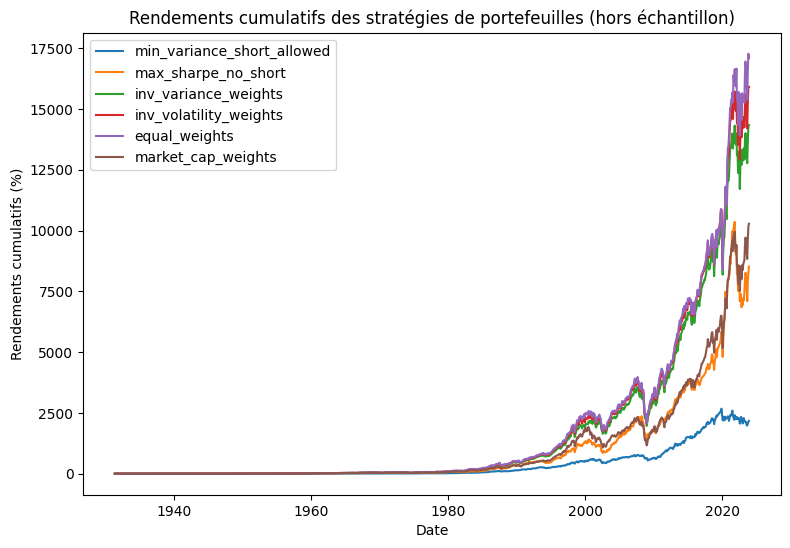

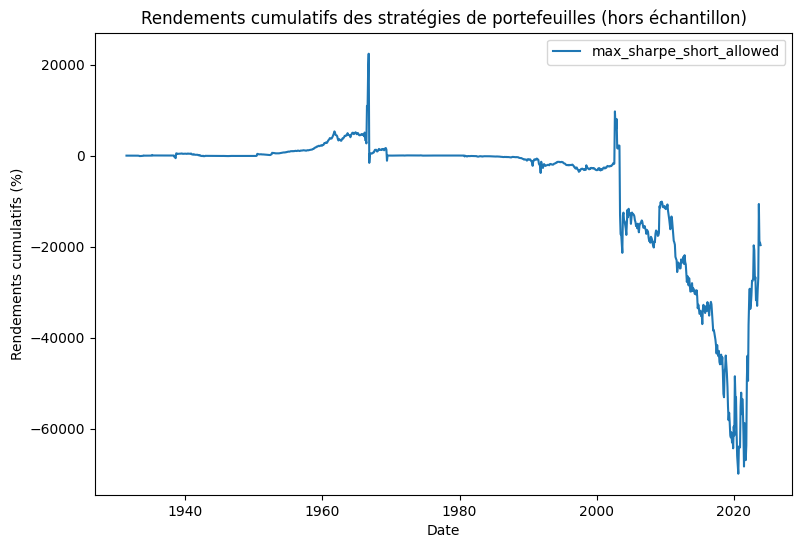

In [2]:
# Import data and clean
csv_file_path_10ind        = '/Users/thomasdeconinck/Documents/GitHub/Gestion de Portefeuille Devoir 2/Partie A/Data /10_Industry_Portfolios.CSV'
df_10Ind                   = f.importClean_10ind(csv_file_path_10ind, desired_returns= 'Average Value Weighted Returns -- Monthly')

csv_file_path_rf           = '/Users/thomasdeconinck/Documents/GitHub/Gestion de Portefeuille Devoir 2/Partie A/Data /F-F_Research_Data_Factors.CSV'
df_rf                      = f.importClean_rf(csv_file_path_rf)

csv_file_path_number_firm  = '/Users/thomasdeconinck/Documents/GitHub/Gestion de Portefeuille Devoir 2/Partie A/Data /10_Industry_Portfolios.CSV'
df_number_firm             = f.importClean_10ind(csv_file_path_number_firm, desired_returns='Number of Firms in Portfolios')

csv_file_path_avg_firm_size= '/Users/thomasdeconinck/Documents/GitHub/Gestion de Portefeuille Devoir 2/Partie A/Data /10_Industry_Portfolios.CSV'
df_average_firm_size       = f.importClean_10ind(csv_file_path_avg_firm_size, desired_returns='Average Firm Size')


# Rolling window optimization and out of sample portfolio returns calculation 1)2)3)4)5)6)7)
min_variance_short_allowed = f.Out_of_sample_portfolio_returns(f.rolling_window_optimization(df_10Ind, df_rf, df_average_firm_size, df_number_firm, 60, optimization_type= 'min_variance_short_allowed'), df_10Ind)
max_sharpe_no_short        = f.Out_of_sample_portfolio_returns(f.rolling_window_optimization(df_10Ind, df_rf, df_average_firm_size, df_number_firm, 60, optimization_type= 'max_sharpe_no_short'), df_10Ind)
max_sharpe_short_allowed   = f.Out_of_sample_portfolio_returns(f.rolling_window_optimization(df_10Ind, df_rf, df_average_firm_size, df_number_firm, 60, optimization_type= 'max_sharpe_short_allowed'), df_10Ind)
inv_variance_weights       = f.Out_of_sample_portfolio_returns(f.rolling_window_optimization(df_10Ind, df_rf, df_average_firm_size, df_number_firm, 60, optimization_type= 'inv_variance_weights'), df_10Ind)
inv_volatility_weights     = f.Out_of_sample_portfolio_returns(f.rolling_window_optimization(df_10Ind, df_rf, df_average_firm_size, df_number_firm, 60, optimization_type= 'inv_volatility_weights'), df_10Ind)
equal_weights              = f.Out_of_sample_portfolio_returns(f.rolling_window_optimization(df_10Ind, df_rf, df_average_firm_size, df_number_firm, 60, optimization_type= 'equal_weights'), df_10Ind)
market_cap_weights         = f.Out_of_sample_portfolio_returns(f.rolling_window_optimization(df_10Ind, df_rf, df_average_firm_size, df_number_firm, 60, optimization_type= 'market_cap_weights'), df_10Ind)


# Plot cumulative returns for out of sample portfolio returns 
strategies                 = ['min_variance_short_allowed', 'max_sharpe_no_short', 'inv_variance_weights', 'inv_volatility_weights', 'equal_weights', 'market_cap_weights']
f.plot_cumulative_returns(df_10Ind, strategies, df_rf, df_average_firm_size, df_number_firm)

# Plot cumulative returns for out of sample portfolio returns for max_sharpe_short_allowed strategy (3)
strategies                 = ['max_sharpe_short_allowed']
f.plot_cumulative_returns(df_10Ind, strategies, df_rf, df_average_firm_size, df_number_firm)

In [3]:
# Sharpe Ratio calculation for backtested portfolio 1)2)3)4)5)6)7)
strategies_results = {
    'Min Variance Optimization': min_variance_short_allowed,
    'Max Sharpe No Short': max_sharpe_no_short,
    'Max Sharpe Short Allowed': max_sharpe_short_allowed,
    'Inv Variance Port': inv_variance_weights,
    'Inv Volatility Port': inv_volatility_weights,
    'EW Port': equal_weights,
    'VW Port': market_cap_weights
}
periods          = [('1931-07-01', '2023-12-31'), ('1990-01-01', '2023-12-31'), ('2000-01-01', '2023-12-31')]

Sharpe_ratio_df  = f.annualized_statistics_and_sharpe_ratios(strategies_results, periods, df_rf)
Sharpe_ratio_df

Annualized Mean Return  \
Strategy                  Start Date End Date                            
Min Variance Optimization 1931-07-01 2023-12-31                 9.4925   
                          1990-01-01 2023-12-31                 9.1824   
                          2000-01-01 2023-12-31                 6.9988   
Max Sharpe No Short       1931-07-01 2023-12-31                12.1084   
                          1990-01-01 2023-12-31                11.3122   
                          2000-01-01 2023-12-31                 9.5509   
Max Sharpe Short Allowed  1931-07-01 2023-12-31               -16.3217   
                          1990-01-01 2023-12-31               -25.2806   
                          2000-01-01 2023-12-31               -42.1318   
Inv Variance Port         1931-07-01 2023-12-31                12.3849   
                          1990-01-01 2023-12-31                11.6680   
                          2000-01-01 2023-12-31                 9.6439   
Inv Volatility Port       1931-07-01 2023-12-31                12.6438   
                          1990-01-01 2023-12-31                11.9123   
                          2000-01-01 2023-12-31                 9.7234   
EW Port                   1931-07-01 2023-12-31                12.8817   
                          1990-01-01 2023-12-31                12.1968   
                          2000-01-01 2023-12-31                 9.8343   
VW Port                   1931-07-01 2023-12-31                12.3751   
                          1990-01-01 2023-12-31                11.9868   
                          2000-01-01 2023-12-31                 9.0984   

                                                Annualized Std Deviation  \
Strategy                  Start Date End Date                              
Min Variance Optimization 1931-07-01 2023-12-31                  12.4969   
                          1990-01-01 2023-12-31                  12.2473   
                          2000-01-01 2023-12-31                  12.5458   
Max Sharpe No Short       1931-07-01 2023-12-31                  17.3420   
                          1990-01-01 2023-12-31                  15.0376   
                          2000-01-01 2023-12-31                  15.3775   
Max Sharpe Short Allowed  1931-07-01 2023-12-31                 501.2777   
                          1990-01-01 2023-12-31                 171.6034   
                          2000-01-01 2023-12-31                 200.2431   
Inv Variance Port         1931-07-01 2023-12-31                  16.1342   
                          1990-01-01 2023-12-31                  13.1647   
                          2000-01-01 2023-12-31                  13.6974   
Inv Volatility Port       1931-07-01 2023-12-31                  16.8530   
                          1990-01-01 2023-12-31                  13.7374   
                          2000-01-01 2023-12-31                  14.3608   
EW Port                   1931-07-01 2023-12-31                  17.6383   
                          1990-01-01 2023-12-31                  14.5562   
                          2000-01-01 2023-12-31                  15.3394   
VW Port                   1931-07-01 2023-12-31                  18.0501   
                          1990-01-01 2023-12-31                  15.2429   
                          2000-01-01 2023-12-31                  15.8686   

                                                Sharpe Ratio  
Strategy                  Start Date End Date                 
Min Variance Optimization 1931-07-01 2023-12-31       0.4986  
                          1990-01-01 2023-12-31       0.4834  
                          2000-01-01 2023-12-31       0.2979  
Max Sharpe No Short       1931-07-01 2023-12-31       0.5101  
                          1990-01-01 2023-12-31       0.5353  
                          2000-01-01 2023-12-31       0.4090  
Max Sharpe Short Allowed  1931-07-01 2023-12-31      -0.0391  
                          199

## Partie B